In [52]:
import pandas as pd
import numpy as np
import pyreadr

In [122]:
import pyreadr

Assault1 = pyreadr.read_r('all_feature_set_ASSAULT_interval_1.RData')# 9 - 12 
Assault2 = pyreadr.read_r('all_feature_set_ASSAULT_interval_2.RData')# 12 - 15 
Assault3 = pyreadr.read_r('all_feature_set_ASSAULT_interval_3.RData')# 15 - 18
Assault4 = pyreadr.read_r('all_feature_set_ASSAULT_interval_4.RData')#18 - 21 
Assault5 = pyreadr.read_r('all_feature_set_ASSAULT_interval_5.RData')#21 - 24

In [3]:
Assault1 = Assault1["all_feature_set"]
Assault2 = Assault2["all_feature_set"]
Assault3 = Assault3["all_feature_set"]
Assault4 = Assault4["all_feature_set"]
Assault5 = Assault5["all_feature_set"]

In [4]:
# With Dynamic Features
feature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy','similarity',
                'Entropy','user_count','observation_freq','Visitor_ratio','area_popularity']

#Without Dynamic Features
WOfeature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy']
#Change DataFrame name and features everytime, thus reducing redundant code 
Assault1[feature_cols] = np.nan_to_num(Assault1[feature_cols])
Assault1[feature_cols] = sklearn.preprocessing.normalize(Assault1[feature_cols], norm='l1',
                                                         axis=1, copy=True, return_norm=False)

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X = Assault1[feature_cols]
y = Assault1['response']
X_resampled, y_resampled = rus.fit_resample(X, y)

C:\Users\noura\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.50)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


logreg.score(X_test, y_test)


C:\Users\noura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\noura\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Traffic 9 - 12, auc="+str(auc))#Change label 
plt.legend(loc=4)
plt.show()
print(roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, y_train)

print(roc_auc_score(y_test, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(roc_auc_score(y_test, predictions))

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
p = clf.predict(X_test)
print(roc_auc_score(y_test, p))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

In [ ]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', logreg)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

In [2]:
import pyreadr
Traffic1 = pyreadr.read_r('all_feature_set_TRAFFIC_interval_1.RData') 
Traffic2 = pyreadr.read_r('all_feature_set_TRAFFIC_interval_2.RData')
Traffic3 = pyreadr.read_r('all_feature_set_TRAFFIC_interval_3.RData')
Traffic4 = pyreadr.read_r('all_feature_set_TRAFFIC_interval_4.RData')
Traffic5 = pyreadr.read_r('all_feature_set_TRAFFIC_interval_5.RData')

In [3]:
Traffic1 = Traffic1["all_feature_set"]
Traffic2 = Traffic2["all_feature_set"]
Traffic3 = Traffic3["all_feature_set"]
Traffic4 = Traffic4["all_feature_set"]
Traffic5 = Traffic5["all_feature_set"]

In [4]:
# With Dynamic Features
feature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy','similarity',
                'Entropy','user_count','observation_freq','Visitor_ratio','area_popularity']

#Without Dynamic Features
WOfeature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy']
#Change Variable name and features everytime, thus reducing redundant code 
Traffic1[feature_cols] = np.nan_to_num(Traffic1[feature_cols])
Traffic1[feature_cols] = sklearn.preprocessing.normalize(Traffic1[feature_cols], norm='l1',
                                                         axis=1, copy=True, return_norm=False)

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X = Traffic1[feature_cols]
y = Traffic1['response']
X_resampled, y_resampled = rus.fit_resample(X, y)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.50)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


logreg.score(X_test, y_test)


C:\Users\noura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6710526315789473

In [7]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.6732026143790849

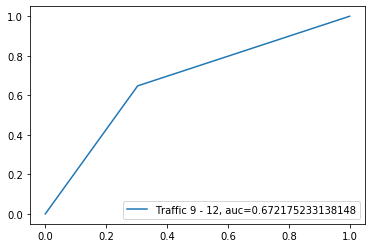

0.672175233138148


In [15]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Traffic 9 - 12, auc="+str(auc))#Change label 
plt.legend(loc=4)
plt.show()
print(roc_auc_score(y_test, y_pred))

In [29]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, y_train)

print(roc_auc_score(y_test, Y_pred))

0.5992639099372158


C:\Users\noura\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

print(roc_auc_score(y_test, predictions))

0.8638882875081186


In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
p = clf.predict(X_test)
print(roc_auc_score(y_test, p))

0.5033557046979866


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

In [ ]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', logreg)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

In [4]:
Burglary1 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_BURGLARY_interval_1.RData') 
Burglary2 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_BURGLARY_interval_2.RData')
Burglary3 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_BURGLARY_interval_3.RData')
Burglary4 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_BURGLARY_interval_4.RData')
Burglary5 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_BURGLARY_interval_5.RData')


In [5]:
Burglary1 = Burglary1["all_feature_set"]
Burglary2 = Burglary2["all_feature_set"]
Burglary3 = Burglary3["all_feature_set"]
Burglary4 = Burglary4["all_feature_set"]
Burglary5 = Burglary5["all_feature_set"]

In [218]:
import sklearn.preprocessing
# With Dynamic Features
feature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy','similarity',
                'Entropy','user_count','observation_freq','Visitor_ratio','area_popularity']

#Without Dynamic Features
WOfeature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy']
#Change DataFrame name and features everytime, thus reducing redundant code 

Burglary5[WOfeature_cols] = np.nan_to_num(Burglary5[WOfeature_cols])

Burglary5[WOfeature_cols] = sklearn.preprocessing.normalize(Burglary5[WOfeature_cols], norm='l1',
                                                         axis=1, copy=True, return_norm=False)

In [219]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X = Burglary5[WOfeature_cols]
y = Burglary5['response']
X_resampled, y_resampled = rus.fit_resample(X, y)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.50)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


logreg.score(X_test, y_test)

C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4916874480465503

In [221]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

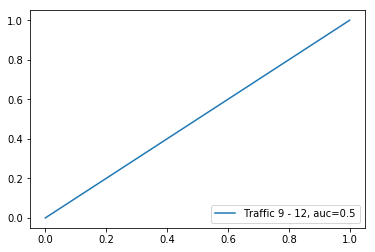

0.5


In [222]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Traffic 9 - 12, auc="+str(auc))#Change label 
plt.legend(loc=4)
plt.show()
print(roc_auc_score(y_test, y_pred))

In [223]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, y_train)

print(roc_auc_score(y_test, Y_pred))

0.4987320371935757


In [224]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(roc_auc_score(y_test, predictions))

0.6944486107012052


In [225]:
y_pred = rf.predict(X_test)
f1_score(y_test, predictions.round())

0.6380913869793773

In [227]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
p = clf.predict(X_test)
print(roc_auc_score(y_test, p))

0.558392296426135


In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 21}


In [229]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 200}


In [230]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(logreg.score(X_test, y_test)))

knn: 0.5261845386533666
rf: 0.6296758104738155
log_reg: 0.4916874480465503


In [231]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', logreg)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)
p = ensemble.predict(X_test)
print(roc_auc_score(y_test, p))

C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5707439613660131


In [53]:

Drug1 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_DRUG_interval_1.RData') 
Drug2 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_DRUG_interval_2.RData')
Drug3 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_DRUG_interval_3.RData')
Drug4 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_DRUG_interval_4.RData')
Drug5 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_DRUG_interval_5.RData')

In [54]:
Drug1 = Drug1["all_feature_set"]
Drug2 = Drug2["all_feature_set"]
Drug3 = Drug3["all_feature_set"]
Drug4 = Drug4["all_feature_set"]
Drug5 = Drug5["all_feature_set"]

In [55]:
import sklearn.preprocessing
# With Dynamic Features
feature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy','similarity',
                'Entropy','user_count','observation_freq','Visitor_ratio','area_popularity']

#Without Dynamic Features
WOfeature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy']
#Change DataFrame name and features everytime, thus reducing redundant code 
Drug1[feature_cols] = np.nan_to_num(Drug1[feature_cols])
Drug1[feature_cols] = sklearn.preprocessing.normalize(Drug1[feature_cols], norm='l1',
                                                      axis=1, copy=True, return_norm=False)

C:\Users\Ruba3\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ruba3\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [56]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
rus = RandomUnderSampler(random_state=0)
X = Drug1[feature_cols]
y = Drug1['response']
X_resampled, y_resampled = rus.fit_resample(X, y)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.50)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


logreg.score(X_test, y_test)

Y_pred = logreg.predict(X_test)
print(roc_auc_score(y_test, Y_pred))

0.5


C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


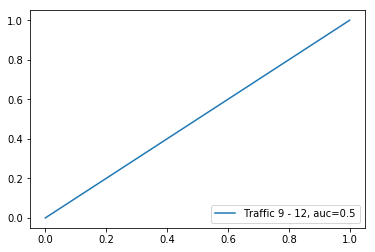

0.5


In [61]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
auc = metrics.roc_auc_score(y_test, Y_pred)
plt.plot(fpr,tpr,label="Traffic 9 - 12, auc="+str(auc))#Change label 
plt.legend(loc=4)
plt.show()
print(roc_auc_score(y_test, Y_pred))

In [38]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, y_train)

print(roc_auc_score(y_test, Y_pred))

0.551038978227781


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
auc = roc_auc_score(y_test, predictions)
print(roc_auc_score(y_test, predictions))

0.8545540776035117


In [322]:
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred.round())

0.740875912408759

In [324]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
p = clf.predict(X_test)
print(roc_auc_score(y_test, p))

0.6616503211324224


In [325]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 7}


In [326]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


In [327]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(logreg.score(X_test, y_test)))

knn: 0.7274155538098979
rf: 0.738675045823514
log_reg: 0.4956794972505892


In [328]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', logreg)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)
p = ensemble.predict(X_test)
print(roc_auc_score(y_test, p))

C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7374638218598252


In [102]:
Theft1 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_LARCENY_interval_3.RData')# 15 - 18
Theft2 = pyreadr.read_r(r'C:\Level 7\ML\Project\New folder\New folder\all_feature_set_LARCENY_interval_5.RData')# 21 - 24 

In [103]:
Theft1 = Theft1["all_feature_set"]
Theft2 = Theft2["all_feature_set"]

In [118]:
feature_cols = ['seasonal_density','crime_density_30','crime_density_population_30','crime_density_7',
                'crime_density_population_7','neighbourhood_crime_density_30','neighbouhood_crime_density_population_30',
               'Neighbourhood_7_days_density','Neighbourhood_7_days_density_population','gender_ratio',
               'ethenic_diversity','Hispanic_percentage','black_percentage','economic_diversity','median_income',
               'Rented_house','median_age','Shop and Service_freq','Outdoor and Recreation_freq','Home_freq',
                'Professional and Other Places_freq','Food_freq','Travel and Transport_freq','Arts and Entertainment_freq',
                'College and University_freq','NightLife Spot_freq','total_density','location_entropy','similarity',
                'Entropy','user_count','observation_freq','Visitor_ratio','area_popularity']

Theft2[feature_cols] = np.nan_to_num(Theft2[feature_cols])
Theft2[feature_cols] = sklearn.preprocessing.normalize(Theft2[feature_cols], norm='l1',
                                                      axis=1, copy=True, return_norm=False)

C:\Users\Ruba3\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ruba3\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [119]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X = Theft2[feature_cols]
y = Theft2['response']
X_resampled, y_resampled = rus.fit_resample(X, y)

In [120]:
#normalize all the features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
minmax = min_max_scaler.fit_transform(Theft1[feature_cols])

In [121]:
#find correlation with LR model between the most important 12 features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.50)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


#print(logreg.coef_)

coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],feature_cols):
    coef_dict[feat] = coef
    
print(coef_dict)

C:\Users\Ruba3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'seasonal_density': 0.05167124411452302, 'crime_density_30': 1.1227107604277722, 'crime_density_population_30': -0.5041158654695703, 'crime_density_7': 0.2713668868741348, 'crime_density_population_7': 0.0015286558252941887, 'neighbourhood_crime_density_30': 0.40178717538294595, 'neighbouhood_crime_density_population_30': 0.10187746953061771, 'Neighbourhood_7_days_density': 0.07806829362675537, 'Neighbourhood_7_days_density_population': 0.10186966614691247, 'gender_ratio': -0.2823941007689177, 'ethenic_diversity': -0.023092686083772945, 'Hispanic_percentage': -0.10884582126567031, 'black_percentage': -0.7058021277386282, 'economic_diversity': -0.008398868246472293, 'median_income': -0.1404237506519068, 'Rented_house': 0.6428748318928533, 'median_age': -0.5776964809137369, 'Shop and Service_freq': -0.009703705983913758, 'Outdoor and Recreation_freq': 0.0024773119040194217, 'Home_freq': 0.0001994312431635243, 'Professional and Other Places_freq': -0.03184529506525487, 'Food_freq': -0.05